*Задание*
Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).
Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями, что мы прошли с вами на лекции.

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")
import matplotlib.pyplot as plt

In [3]:
# отображать графики в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('clients.csv')

In [5]:
df.shape

(195, 25)

In [6]:
# drop missing values
df= df.dropna()

In [7]:
df.shape

(164, 25)

In [8]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [9]:
# USA is recognized two times
#df['Country'].unique()
df['Country'] = df['Country'].replace(['USA '],['USA'])

In [10]:
# the one with the blank space was removed
df['Country'].unique()

array(['USA', 'UK', 'Germany', 'Belgium'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 177
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       164 non-null    int64  
 1   Building                 164 non-null    int64  
 2   Year of sale             164 non-null    int64  
 3   Month of sale            164 non-null    int64  
 4   Type of property         164 non-null    object 
 5   Property number          164 non-null    int64  
 6   Area (ft.)               164 non-null    float64
 7   Price                    164 non-null    object 
 8   Status                   164 non-null    object 
 9   Customer ID              164 non-null    object 
 10  Entity                   164 non-null    object 
 11  Name                     164 non-null    object 
 12  Surname                  164 non-null    object 
 13  Age at time of purchase  164 non-null    float64
 14  Age Interval             1

Text(0.5, 1.0, 'Customer country and gender')

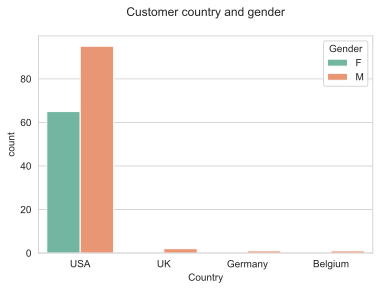

In [12]:
#Who is an average customer? Male or female? Which country?
sns.countplot(data=df, x = 'Country', hue = 'Gender')
plt.title('Customer country and gender', pad=20)
# it is a male from USA

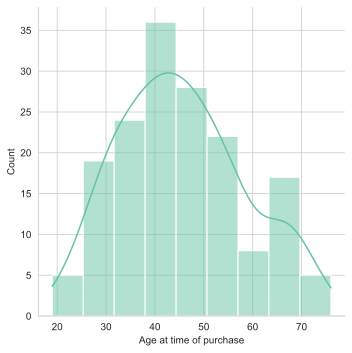

In [13]:
sns.displot(data=df['Age at time of purchase'], kde = True)

In [14]:
mean_male_cust = df['Age at time of purchase'].mean().round(1)
median_male_cust = df['Age at time of purchase'].median()
print(f'Average customer is a male from USA and is approximately {mean_male_cust} years old')
print(f'Median customer is a male from USA and is approximately {median_male_cust} years old')

Average customer is a male from USA and is approximately 45.5 years old
Median customer is a male from USA and is approximately 44.0 years old


Text(0.5, 1.0, 'Type of property and its purpose')

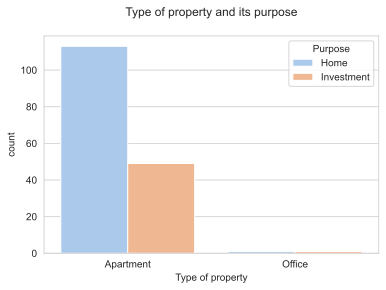

In [17]:
# Which type of property our customer buys and what is the purpose?
sns.set_palette('pastel')
sns.countplot(data=df, x = 'Type of property', hue = 'Purpose')
plt.title('Type of property and its purpose', pad=20)

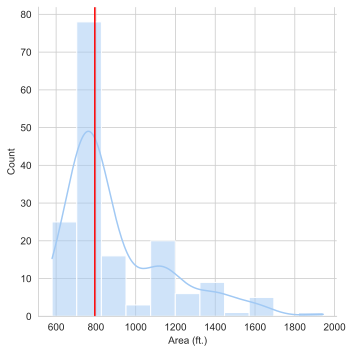

In [19]:
#What is the property's size?
sns.displot(data=df['Area (ft.)'], kde = True)
plt.axvline(x=df['Area (ft.)'].median(),
            color='red')

In [20]:
#Mean in this case is very different from median, as there are many outliers. We will therefore use median here as a more robust parameter of approximation
median_area = df['Area (ft.)'].median()
print(f'Median property is an apartment of {median_area} ft.')

Median property is an apartment of 794.52 ft.


In [21]:
# first convert price to float
df['Price_int'] = df['Price'].replace({'\$': '', ',': ''}, regex = True)
df['Price_int'] = df['Price_int'].astype('float64')

In [22]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Price_int
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,6.0,21.0,F,USA,California,Home,5,No,Website,246172.68
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,2.0,24.0,F,USA,California,Home,5,No,Website,246331.90
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,12.0,27.0,M,USA,California,Home,1,Yes,Client,209280.91
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,12.0,27.0,M,USA,California,Investment,3,Yes,Website,452667.01
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,5.0,15.0,F,USA,California,Home,4,No,Agency,467083.31


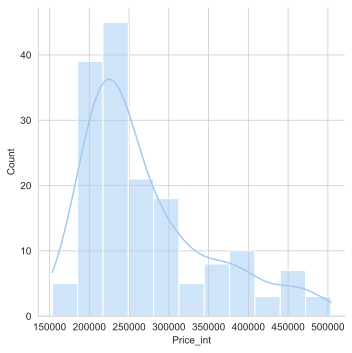

In [23]:
sns.displot(data=df['Price_int'], kde = True)


In [24]:
median_price = df['Price_int'].median()
print(f'Median price of the property is $ {median_price} ')

Median price of the property is $ 242896.625 


<AxesSubplot:xlabel='Source', ylabel='count'>

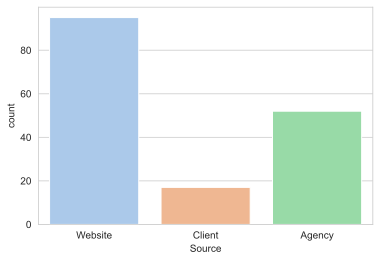

In [25]:
sns.countplot(data=df, x = 'Source')

In [26]:
print(f'So our customer is a male from USA, approximately {median_male_cust} years old, buying an apartment as his home of approximately {median_area} ft. for $ {median_price} and he found out about a property it through a website.')

So our customer is a male from USA, approximately 44.0 years old, buying an apartment as his home of approximately 794.52 ft. for $ 242896.625 and he found out about a property it through a website.
